In [2]:
#In this code I'm going to see if we can train a NN from one game and have it predict positions from the next game
#Importing the libraries
from data_loader_2 import FootballDataLoader2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU


In [4]:
#Preparing training and testing data
data_dir = r"\Users\kirlo\Documents\Sanvi University Work\Year 3\AML\final project\FootballData\RestructuredData_2425"  # replace with your actual data directory
team = "FCK"         
data_retriever = FootballDataLoader2(data_dir, team)
all_games = data_retriever.load_all_games(n_games= 2)
training_game = all_games[0]
testing_game = all_games[1]

Reading game 1: Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Loading Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Data read.
Time shape: (155541, 2)
Ball shape: (155541, 5)
Team shape: (155541, 75)
Opponent shape: (155541, 80)
Total shape: (78147, 162)
Opponent name detected from filename: RFC
Reading game 2: Game_FCK_VFF_Score_1_1_Day_2024-08-18Z.pkl
Loading Game_FCK_VFF_Score_1_1_Day_2024-08-18Z.pkl
Data read.
Time shape: (158121, 2)
Ball shape: (158121, 5)
Team shape: (158121, 80)
Opponent shape: (158121, 80)
Total shape: (75804, 167)
Opponent name detected from filename: VFF


In [5]:
training_game

,Time,game,Ball_x,Ball_y,Ball_z,Ball_Speed?,Ball_Col5,FCKplayer_1_x,FCKplayer_1_y,FCKplayer_1_z,FCKplayer_1_speed_x,FCKplayer_1_number,FCKplayer_2_x,FCKplayer_2_y,FCKplayer_2_z,FCKplayer_2_speed_x,FCKplayer_2_number,FCKplayer_4_x,FCKplayer_4_y,FCKplayer_4_z,FCKplayer_4_speed_x,FCKplayer_4_number,FCKplayer_8_x,FCKplayer_8_y,FCKplayer_8_z,FCKplayer_8_speed_x,FCKplayer_8_number,FCKplayer_10_x,FCKplayer_10_y,FCKplayer_10_z,FCKplayer_10_speed_x,FCKplayer_10_number,FCKplayer_11_x,FCKplayer_11_y,FCKplayer_11_z,FCKplayer_11_speed_x,FCKplayer_11_number,FCKplayer_13_x,FCKplayer_13_y,FCKplayer_13_z,...,RFCplayer_27_x,RFCplayer_27_y,RFCplayer_27_z,RFCplayer_27_speed_x,RFCplayer_27_number,RFCplayer_44_x,RFCplayer_44_y,RFCplayer_44_z,RFCplayer_44_speed_x,RFCplayer_44_number,RFCplayer_90_x,RFCplayer_90_y,RFCplayer_90_z,RFCplayer_90_speed_x,RFCplayer_90_number,RFCplayer_24_x,RFCplayer_24_y,RFCplayer_24_z,RFCplayer_24_speed_x,RFCplayer_24_number,RFCplayer_7_x,RFCplayer_7_y,RFCplayer_7_z,RFCplayer_7_speed_x,RFCplayer_7_number,RFCplayer_19_x,RFCplayer_19_y,RFCplayer_19_z,RFCplayer_19_speed_x,RFCplayer_19_number,RFCplayer_5_x,RFCplayer_5_y,RFCplayer_5_z,RFCplayer_5_speed_x,RFCplayer_5_number,RFCplayer_15_x,RFCplayer_15_y,RFCplayer_15_z,RFCplayer_15_speed_x,RFCplayer_15_number
0,0.00,1,-0.09,0.06,0.33,1.67,0,-38.62,-0.39,0.0,0.00,1,-15.42,-9.58,0.0,0.00,2.0,-18.33,5.17,0.0,0.00,4,-0.43,-1.30,0.0,0.00,8,-0.95,26.98,0.0,0.00,10,-0.39,-18.47,0.0,0.00,11.0,-12.49,-20.06,0.0,...,13.15,22.39,0.0,0.00,27,14.52,-16.04,0.0,0.00,44.0,0.91,13.69,0.0,0.00,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.04,1,-0.14,0.06,0.33,1.66,0,-38.63,-0.38,0.0,0.18,1,-15.43,-9.58,0.0,0.19,2.0,-18.34,5.17,0.0,0.07,4,-0.43,-1.29,0.0,0.14,8,-0.95,26.98,0.0,0.04,10,-0.38,-18.47,0.0,0.13,11.0,-12.49,-20.06,0.0,...,13.17,22.40,0.0,0.16,27,14.53,-16.03,0.0,0.21,44.0,0.92,13.68,0.0,0.21,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.08,1,-0.14,0.06,0.33,1.65,0,-38.64,-0.37,0.0,0.35,1,-15.45,-9.59,0.0,0.38,2.0,-18.34,5.17,0.0,0.13,4,-0.44,-1.29,0.0,0.28,8,-0.95,26.97,0.0,0.07,10,-0.37,-18.46,0.0,0.26,11.0,-12.49,-20.06,0.0,...,13.18,22.40,0.0,0.33,27,14.54,-16.01,0.0,0.41,44.0,0.94,13.66,0.0,0.41,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.12,1,-0.24,0.02,0.33,1.63,0,-38.65,-0.36,0.0,0.39,1,-15.46,-9.59,0.0,0.43,2.0,-18.35,5.17,0.0,0.11,4,-0.44,-1.27,0.0,0.33,8,-0.95,26.97,0.0,0.05,10,-0.36,-18.47,0.0,0.29,11.0,-12.49,-20.06,0.0,...,13.19,22.41,0.0,0.30,27,14.54,-16.00,0.0,0.41,44.0,0.94,13.65,0.0,0.42,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.16,1,-0.31,-0.01,0.33,1.61,0,-38.66,-0.35,0.0,0.41,1,-15.48,-9.59,0.0,0.45,2.0,-18.35,5.18,0.0,0.16,4,-0.45,-1.26,0.0,0.36,8,-0.95,26.97,0.0,0.00,10,-0.35,-18.48,0.0,0.39,11.0,-12.49,-20.06,0.0,...,13.20,22.41,0.0,0.33,27,14.55,-15.98,0.0,0.38,44.0,0.95,13.64,0.0,0.38,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78142,3125.68,1,-8.89,-28.36,0.18,5.21,1,-27.73,-10.47,0.0,1.69,1,-0.51,-24.99,0.0,3.02,2.0,-7.78,-25.83,0.0,3.96,4,1.54,0.65,0.0,1.51,8,33.70,4.37,0.0,1.28,10,26.45,-22.86,0.0,1.72,11.0,15.24,-33.69,0.0,...,28.82,8.39,0.0,1.40,27,27.46,-21.87,0.0,1.20,44.0,19.44,2.70,0.0,0.98,90.0,24.67,6.96,0.0,1.15,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78143,3125.72,1,-9.06,-28.32,0.18,5.19,1,-27.79,-10.48,0.0,1.56,1,-0.61,-24.93,0.0,2.76,2.0,-7.91,-25.91,0.0,3.69,4,1.49,

Epoch 1/10


c:\Users\kirlo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2200/2200 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 123.2166 - mae: 7.2259 - val_loss: 2.6362 - val_mae: 0.8870
Epoch 2/10
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.9721 - mae: 0.5549 - val_loss: 0.7583 - val_mae: 0.4514
Epoch 3/10
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4225 - mae: 0.3404 - val_loss: 0.4061 - val_mae: 0.2840
Epoch 4/10
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.3085 - mae: 0.3069 - val_loss: 0.3684 - val_mae: 0.3134
Epoch 5/10
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2824 - mae: 0.2889 - val_loss: 0.3667 - val_mae: 0.3269
Epoch 6/10
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2928 - mae: 0.2896 - val_loss: 0.3602 - val_mae: 0.3377
Epoch 7/10
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2610 - mae: 0.2705 - val_loss: 0.3600 - val_mae: 0.3320
Epoch 8/10
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2851 - mae: 0.2827 - val_loss: 0.3332 - val_mae: 0.3107
Epoch 9/10
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms

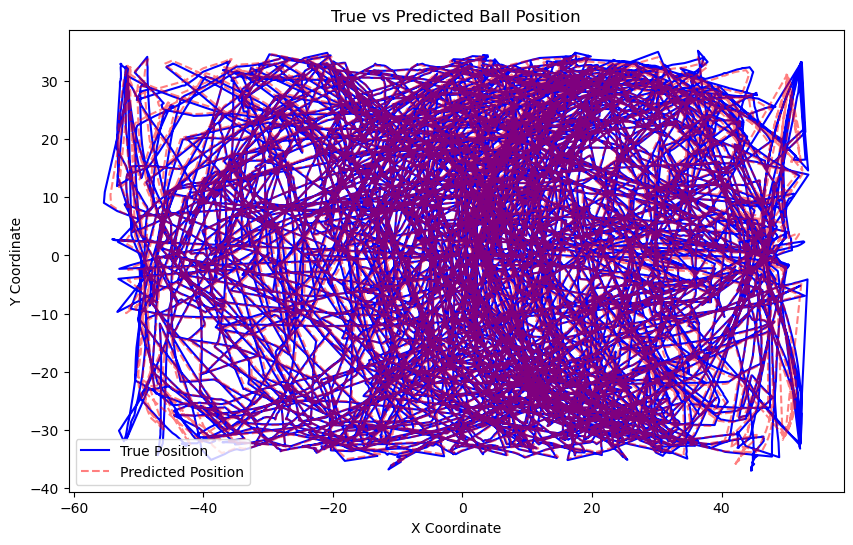

In [8]:
#Then from here its basically the same thing as with the other game. Start with the training game
train_n_time_steps = training_game.shape[0]
train_positions = training_game[['Ball_x', 'Ball_y']].values

train_X = []
train_y = []

for i in range(train_n_time_steps - 1):
    train_X.append(train_positions[i])
    train_y.append(train_positions[i + 1])
train_X_reshaped = np.array(train_X)
train_y_reshaped = np.array(train_y)

# Reshape for RNN: (samples, timesteps, features)
train_X_reshaped = train_X_reshaped.reshape((train_X_reshaped.shape[0], 1, train_X_reshaped.shape[1]))
train_y_reshaped = train_y_reshaped.reshape((train_y_reshaped.shape[0], 2))

#Creating the RNN
model = Sequential()
model.add(GRU(64, input_shape=(train_X_reshaped.shape[1], train_X_reshaped.shape[2]), return_sequences=True))
model.add(GRU(64))
model.add(Dense(2, activation='linear'))  # I guessed this for now. When the code works change it for a more suitable activation function
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.compile(optimizer='adam', loss='mse')
#Training the model
model.fit(train_X_reshaped, train_y_reshaped, epochs=10, batch_size=32, validation_split=0.2)
#Evaluating the model
test_positions = testing_game[['Ball_x', 'Ball_y']].values
test_X = []
test_y = []
test_n_time_steps = testing_game.shape[0]
for i in range(test_n_time_steps - 1):
    test_X.append(test_positions[i])
    test_y.append(test_positions[i + 1])
test_X_reshaped = np.array(test_X)
test_y_reshaped = np.array(test_y)
# Reshape test_X_reshaped for RNN input
test_X_reshaped = test_X_reshaped.reshape((test_X_reshaped.shape[0], 1, test_X_reshaped.shape[1]))
predictions = model.predict(test_X_reshaped)
#Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(test_y_reshaped[:, 0], test_y_reshaped[:, 1], label='True Position', color='blue')
plt.plot(predictions[:, 0], predictions[:, 1], label='Predicted Position', color='red', alpha=0.5, linestyle='--')
plt.title('True vs Predicted Ball Position')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()



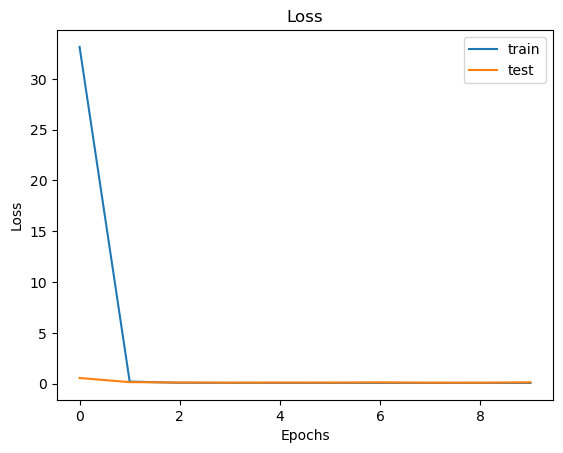

The mae for the GRU is: 0.08231212198734283


In [7]:
#Plotting loss
history = model.history.history
plt.plot(history['loss'], label='train')
plt.plot(history['val_loss'], label='test')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

mae_gru = history['mae'][-1]
print(f'The mae for the GRU is: {mae_gru}')